In [34]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [35]:
df_census=pd.read_csv("adult.csv")
df_census

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [36]:
df_census.shape

(32561, 15)

In [37]:
df_census.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [38]:
df_census.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [39]:
df_census.workclass.unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [40]:
df_census=df_census[df_census.workclass != '?']

In [41]:
df_census

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K


In [42]:
df_census.shape

(30725, 15)

In [43]:
print('?' in df_census.workclass)

False


In [44]:
df_census.education.unique()

array(['HS-grad', '7th-8th', 'Some-college', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [45]:
df_census.marital_status.unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [46]:
df_census.occupation.unique()

array(['Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv', '?'], dtype=object)

In [47]:
df_census.relationship.unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

In [49]:
df_census.race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [50]:
df_census.sex.unique()

array(['Female', 'Male'], dtype=object)

In [51]:
df_census.native_country.unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'Hungary', 'Columbia', 'Guatemala', 'El-Salvador',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Portugal', 'Laos',
       'Thailand', 'Outlying-US(Guam-USVI-etc)', 'Scotland'], dtype=object)

In [52]:
df_census.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [53]:
df_census.shape

(30725, 15)

In [55]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_census["sex"]=le.fit_transform(df_census["sex"])
df_census.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,0,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,1,0,3770,40,United-States,<=50K


In [56]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_census["income"]=le.fit_transform(df_census["income"])
df_census.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,0,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,1,0,3770,40,United-States,0


In [58]:
df_census.isnull()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [59]:
df_census.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

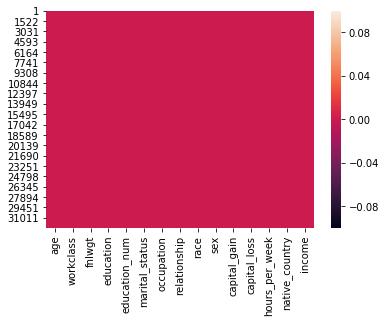

In [61]:
sns.heatmap(df_census.isnull())

In [62]:
df_census.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

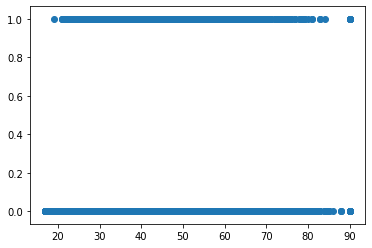

In [63]:
plt.scatter(df_census['age'],df_census['income'])
plt.show()

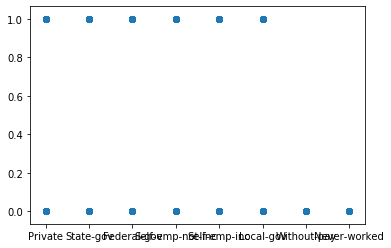

In [65]:
plt.scatter(df_census['workclass'],df_census['income'])
plt.show()

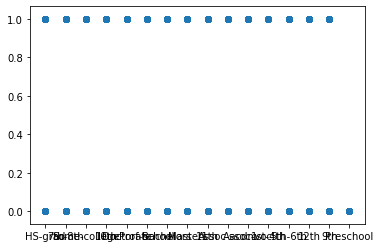

In [66]:
plt.scatter(df_census['education'],df_census['income'])
plt.show()

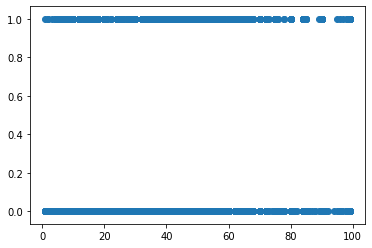

In [67]:
plt.scatter(df_census['hours_per_week'],df_census['income'])
plt.show()

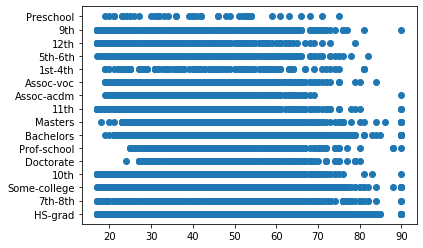

In [68]:
plt.scatter(df_census['age'],df_census['education'])
plt.show()

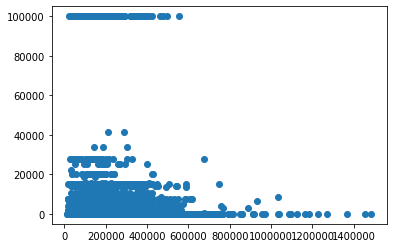

In [69]:
plt.scatter(df_census['fnlwgt'],df_census['capital_gain'])
plt.show()

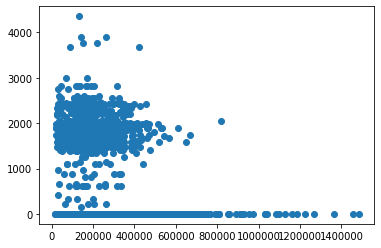

In [70]:
plt.scatter(df_census['fnlwgt'],df_census['capital_loss'])
plt.show()

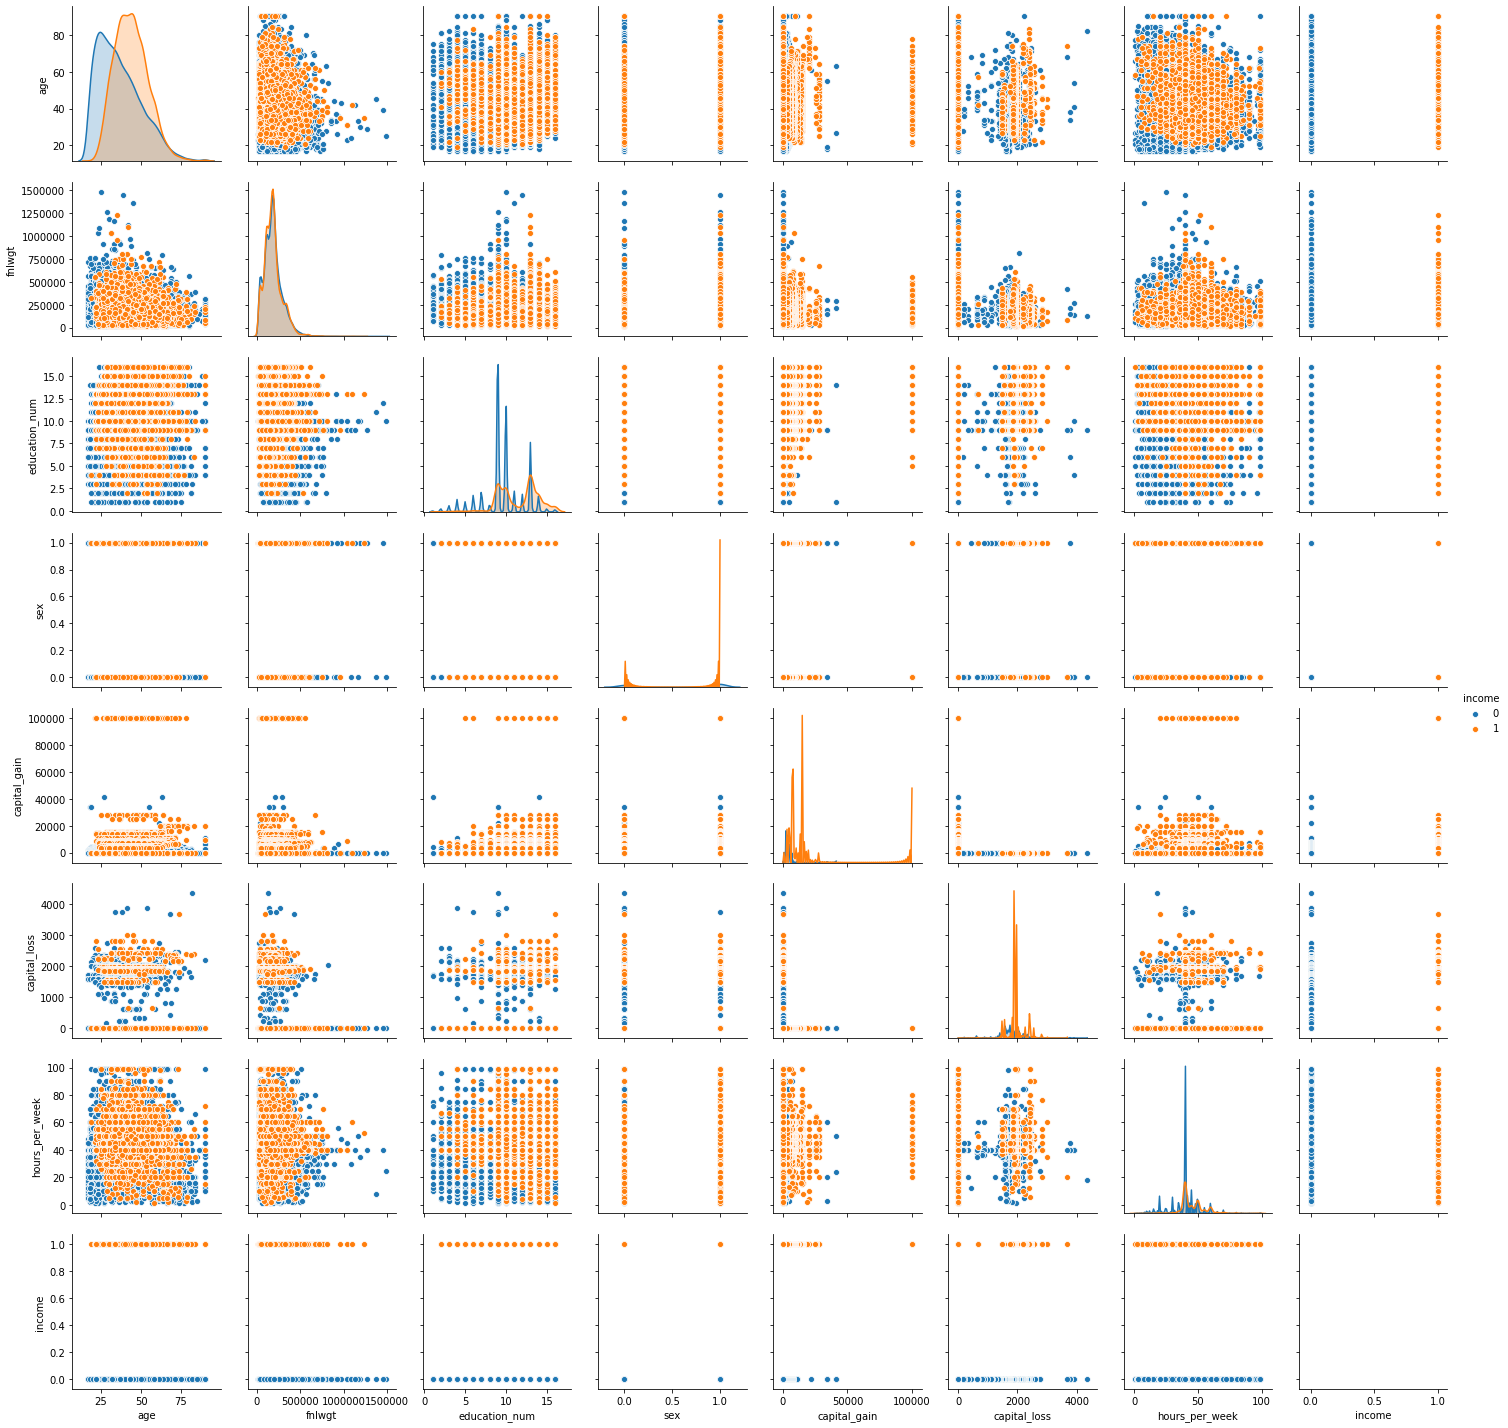

In [71]:
sns.pairplot(df_census,hue='income')

In [72]:
df_census.corr()

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,income
age,1.000000,-0.076628,0.043884,0.082028,0.080420,0.060463,0.102192,0.242546
fnlwgt,-0.076628,1.000000,-0.043515,0.026647,-0.000200,-0.010026,-0.022761,-0.009489
education_num,0.043884,-0.043515,1.000000,0.007390,0.124257,0.079357,0.151367,0.334697
sex,0.082028,0.026647,0.007390,1.000000,0.047750,0.047000,0.230253,0.216584
capital_gain,0.080420,-0.000200,0.124257,0.047750,1.000000,-0.032325,0.079560,0.221882
capital_loss,0.060463,-0.010026,0.079357,0.047000,-0.032325,1.000000,0.053998,0.151483
hours_per_week,0.102192,-0.022761,0.151367,0.230253,0.079560,0.053998,1.000000,0.228611
income,0.242546,-0.009489,0.334697,0.216584,0.221882,0.151483,0.228611,1.000000


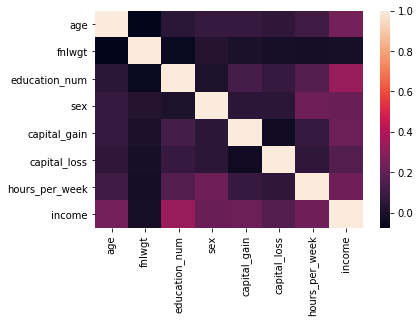

In [73]:
sns.heatmap(df_census.corr())

In [76]:
df_census.skew()

age                0.531668
fnlwgt             1.457197
education_num     -0.310258
sex               -0.755813
capital_gain      11.787237
capital_loss       4.514917
hours_per_week     0.330749
income             1.161034
dtype: float64

In [78]:
df_census.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,0,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,1,0,3770,40,United-States,0


In [80]:
dummies=pd.get_dummies(df_census.workclass)
dummies.head()

,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
1,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0
5,0,0,0,1,0,0,0,0
6,0,0,0,1,0,0,0,0


In [82]:
merged=pd.concat([df_census,dummies],axis='columns')
merged.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,native_country,income,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,...,United-States,0,0,0,0,1,0,0,0,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,...,United-States,0,0,0,0,1,0,0,0,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,0,...,United-States,0,0,0,0,1,0,0,0,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,0,...,United-States,0,0,0,0,1,0,0,0,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,1,...,United-States,0,0,0,0,1,0,0,0,0


In [85]:
final=merged.drop(['workclass','Without-pay'],axis='columns')
final

,age,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,...,hours_per_week,native_country,income,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov
1,82,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,0,...,18,United-States,0,0,0,0,1,0,0,0
3,54,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,...,40,United-States,0,0,0,0,1,0,0,0
4,41,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,0,0,...,40,United-States,0,0,0,0,1,0,0,0
5,34,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,0,0,...,45,United-States,0,0,0,0,1,0,0,0
6,38,150601,10th,6,Separated,Adm-clerical,Unmarried,White,1,0,...,40,United-States,0,0,0,0,1,0,0,0
7,74,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,0,0,...,20,United-States,1,0,0,0,0,0,0,1
8,68,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,0,0,...,40,United-States,0,1,0,0,0,0,0,0
9,41,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,1,0,...,60,?,1,0,0,0,1,0,0,0
10,45,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,0,0,...,35,United-States,1,0,0,0,1,0,0,0
11,38,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,1,0,...,45,United-States,1,0,0,0,0,0,1,0


In [86]:
final.shape

(30725, 21)

In [87]:
final.dtypes

age                  int64
fnlwgt               int64
education           object
education_num        int64
marital_status      object
occupation          object
relationship        object
race                object
sex                  int32
capital_gain         int64
capital_loss         int64
hours_per_week       int64
native_country      object
income               int32
Federal-gov          uint8
Local-gov            uint8
Never-worked         uint8
Private              uint8
Self-emp-inc         uint8
Self-emp-not-inc     uint8
State-gov            uint8
dtype: object

In [89]:
final['education'].unique()

array(['HS-grad', '7th-8th', 'Some-college', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [90]:
dummies1=pd.get_dummies(final.education)
dummies1.head()

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
merged1=pd.concat([final,dummies1],axis='columns')
merged1.head()

,age,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,...,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
1,82,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,0,...,0,0,0,0,0,1,0,0,0,0
3,54,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,...,0,0,0,0,0,0,0,0,0,0
4,41,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,0,0,...,0,0,0,0,0,0,0,0,0,1
5,34,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,0,0,...,0,0,0,0,0,1,0,0,0,0
6,38,150601,10th,6,Separated,Adm-clerical,Unmarried,White,1,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
final1=merged1.drop(['education','9th','Preschool'],axis='columns')
final1.head()

,age,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,...,5th-6th,7th-8th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Prof-school,Some-college
1,82,132870,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,...,0,0,0,0,0,0,1,0,0,0
3,54,140359,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,...,0,1,0,0,0,0,0,0,0,0
4,41,264663,10,Separated,Prof-specialty,Own-child,White,0,0,3900,...,0,0,0,0,0,0,0,0,0,1
5,34,216864,9,Divorced,Other-service,Unmarried,White,0,0,3770,...,0,0,0,0,0,0,1,0,0,0
6,38,150601,6,Separated,Adm-clerical,Unmarried,White,1,0,3770,...,0,0,0,0,0,0,0,0,0,0


In [98]:
final1.shape

(30725, 34)

In [100]:
final1.dtypes

age                  int64
fnlwgt               int64
education_num        int64
marital_status      object
occupation          object
relationship        object
race                object
sex                  int32
capital_gain         int64
capital_loss         int64
hours_per_week       int64
native_country      object
income               int32
Federal-gov          uint8
Local-gov            uint8
Never-worked         uint8
Private              uint8
Self-emp-inc         uint8
Self-emp-not-inc     uint8
State-gov            uint8
10th                 uint8
11th                 uint8
12th                 uint8
1st-4th              uint8
5th-6th              uint8
7th-8th              uint8
Assoc-acdm           uint8
Assoc-voc            uint8
Bachelors            uint8
Doctorate            uint8
HS-grad              uint8
Masters              uint8
Prof-school          uint8
Some-college         uint8
dtype: object

In [101]:
dummies2=pd.get_dummies(final1.occupation)
dummies2.head()

,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [102]:
merged2=pd.concat([final1,dummies2],axis='columns')
merged2.head()

,age,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,...,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
1,82,132870,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,...,0,0,0,0,0,0,0,0,0,0
3,54,140359,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,...,0,0,1,0,0,0,0,0,0,0
4,41,264663,10,Separated,Prof-specialty,Own-child,White,0,0,3900,...,0,0,0,0,0,1,0,0,0,0
5,34,216864,9,Divorced,Other-service,Unmarried,White,0,0,3770,...,0,0,0,1,0,0,0,0,0,0
6,38,150601,6,Separated,Adm-clerical,Unmarried,White,1,0,3770,...,0,0,0,0,0,0,0,0,0,0


In [103]:
final2=merged2.drop(['occupation'],axis='columns')
final2.head()

,age,fnlwgt,education_num,marital_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week,...,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
1,82,132870,9,Widowed,Not-in-family,White,0,0,4356,18,...,0,0,0,0,0,0,0,0,0,0
3,54,140359,4,Divorced,Unmarried,White,0,0,3900,40,...,0,0,1,0,0,0,0,0,0,0
4,41,264663,10,Separated,Own-child,White,0,0,3900,40,...,0,0,0,0,0,1,0,0,0,0
5,34,216864,9,Divorced,Unmarried,White,0,0,3770,45,...,0,0,0,1,0,0,0,0,0,0
6,38,150601,6,Separated,Unmarried,White,1,0,3770,40,...,0,0,0,0,0,0,0,0,0,0


In [104]:
final2.shape

(30725, 48)

In [106]:
final2.dtypes

age                   int64
fnlwgt                int64
education_num         int64
marital_status       object
relationship         object
race                 object
sex                   int32
capital_gain          int64
capital_loss          int64
hours_per_week        int64
native_country       object
income                int32
Federal-gov           uint8
Local-gov             uint8
Never-worked          uint8
Private               uint8
Self-emp-inc          uint8
Self-emp-not-inc      uint8
State-gov             uint8
10th                  uint8
11th                  uint8
12th                  uint8
1st-4th               uint8
5th-6th               uint8
7th-8th               uint8
Assoc-acdm            uint8
Assoc-voc             uint8
Bachelors             uint8
Doctorate             uint8
HS-grad               uint8
Masters               uint8
Prof-school           uint8
Some-college          uint8
?                     uint8
Adm-clerical          uint8
Armed-Forces        

In [118]:
final3=final2.drop("marital_status",axis=1)
final3.head()

,age,fnlwgt,education_num,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,...,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
1,82,132870,9,Not-in-family,White,0,0,4356,18,United-States,...,0,0,0,0,0,0,0,0,0,0
3,54,140359,4,Unmarried,White,0,0,3900,40,United-States,...,0,0,1,0,0,0,0,0,0,0
4,41,264663,10,Own-child,White,0,0,3900,40,United-States,...,0,0,0,0,0,1,0,0,0,0
5,34,216864,9,Unmarried,White,0,0,3770,45,United-States,...,0,0,0,1,0,0,0,0,0,0
6,38,150601,6,Unmarried,White,1,0,3770,40,United-States,...,0,0,0,0,0,0,0,0,0,0


In [119]:
final4=final3.drop("relationship",axis=1)
final4.head()

,age,fnlwgt,education_num,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,...,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
1,82,132870,9,White,0,0,4356,18,United-States,0,...,0,0,0,0,0,0,0,0,0,0
3,54,140359,4,White,0,0,3900,40,United-States,0,...,0,0,1,0,0,0,0,0,0,0
4,41,264663,10,White,0,0,3900,40,United-States,0,...,0,0,0,0,0,1,0,0,0,0
5,34,216864,9,White,0,0,3770,45,United-States,0,...,0,0,0,1,0,0,0,0,0,0
6,38,150601,6,White,1,0,3770,40,United-States,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
final5=final4.drop("race",axis=1)
final5.head()

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,native_country,income,Federal-gov,...,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
1,82,132870,9,0,0,4356,18,United-States,0,0,...,0,0,0,0,0,0,0,0,0,0
3,54,140359,4,0,0,3900,40,United-States,0,0,...,0,0,1,0,0,0,0,0,0,0
4,41,264663,10,0,0,3900,40,United-States,0,0,...,0,0,0,0,0,1,0,0,0,0
5,34,216864,9,0,0,3770,45,United-States,0,0,...,0,0,0,1,0,0,0,0,0,0
6,38,150601,6,1,0,3770,40,United-States,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
final6=final5.drop("native_country",axis=1)
final6.head()

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,income,Federal-gov,Local-gov,...,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
1,82,132870,9,0,0,4356,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,54,140359,4,0,0,3900,40,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,41,264663,10,0,0,3900,40,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,34,216864,9,0,0,3770,45,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,38,150601,6,1,0,3770,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
final6.dtypes

age                  int64
fnlwgt               int64
education_num        int64
sex                  int32
capital_gain         int64
capital_loss         int64
hours_per_week       int64
income               int32
Federal-gov          uint8
Local-gov            uint8
Never-worked         uint8
Private              uint8
Self-emp-inc         uint8
Self-emp-not-inc     uint8
State-gov            uint8
10th                 uint8
11th                 uint8
12th                 uint8
1st-4th              uint8
5th-6th              uint8
7th-8th              uint8
Assoc-acdm           uint8
Assoc-voc            uint8
Bachelors            uint8
Doctorate            uint8
HS-grad              uint8
Masters              uint8
Prof-school          uint8
Some-college         uint8
?                    uint8
Adm-clerical         uint8
Armed-Forces         uint8
Craft-repair         uint8
Exec-managerial      uint8
Farming-fishing      uint8
Handlers-cleaners    uint8
Machine-op-inspct    uint8
O

In [123]:
final6.shape

(30725, 44)

In [124]:
final6.corr()

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,income,Federal-gov,Local-gov,...,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
age,1.000000,-0.076628,0.043884,0.082028,0.080420,0.060463,0.102192,0.242546,0.056824,0.068246,...,0.038630,-0.103308,-0.014574,-0.092196,0.017481,0.062508,0.005758,-0.030380,-0.019059,0.031383
fnlwgt,-0.076628,1.000000,-0.043515,0.026647,-0.000200,-0.010026,-0.022761,-0.009489,-0.007889,-0.003113,...,-0.034094,0.029780,0.012986,-0.004093,0.007449,-0.017053,0.016975,0.003593,0.003756,0.001138
education_num,0.043884,-0.043515,1.000000,0.007390,0.124257,0.079357,0.151367,0.334697,0.059165,0.096256,...,-0.108528,-0.136522,-0.169180,-0.182586,-0.075382,0.427378,0.003164,0.024361,0.059414,-0.124505
sex,0.082028,0.026647,0.007390,1.000000,0.047750,0.047000,0.230253,0.216584,-0.001870,-0.043756,...,0.100807,0.094015,0.027393,-0.165268,-0.092992,-0.036016,0.064746,-0.017877,-0.019524,0.133616
capital_gain,0.080420,-0.000200,0.124257,0.047750,1.000000,-0.032325,0.079560,0.221882,-0.006529,-0.008135,...,-0.012587,-0.024442,-0.027366,-0.042277,-0.007691,0.085322,-0.007792,0.010483,-0.010175,-0.019223
capital_loss,0.060463,-0.010026,0.079357,0.047000,-0.032325,1.000000,0.053998,0.151483,0.010351,0.013974,...,-0.011637,-0.023038,-0.017694,-0.043271,-0.011607,0.045970,-0.003823,0.008519,0.004253,-0.004277
hours_per_week,0.102192,-0.022761,0.151367,0.230253,0.079560,0.053998,1.000000,0.228611,0.006483,0.000820,...,0.092185,-0.054048,-0.004200,-0.180557,-0.046941,0.047414,0.023579,-0.005065,-0.022294,0.072465
income,0.242546,-0.009489,0.334697,0.216584,0.221882,0.151483,0.228611,1.000000,0.057095,0.028642,...,-0.056360,-0.093027,-0.075772,-0.166236,-0.039111,0.182563,0.025863,0.017264,0.022844,-0.026320
Federal-gov,0.056824,-0.007889,0.059165,-0.001870,-0.006529,0.010351,0.006483,0.057095,1.000000,-0.048556,...,-0.024379,-0.017951,-0.036802,-0.041083,-0.012537,0.025009,0.010046,-0.057845,0.042634,-0.020983
Local-gov,0.068246,-0.003113,0.096256,-0.043756,-0.008135,0.013974,0.000820,0.028642,-0.048556,1.000000,...,-0.028263,-0.028993,-0.065099,-0.013133,-0.018874,0.160024,0.233384,-0.096476,-0.019032,0.003615


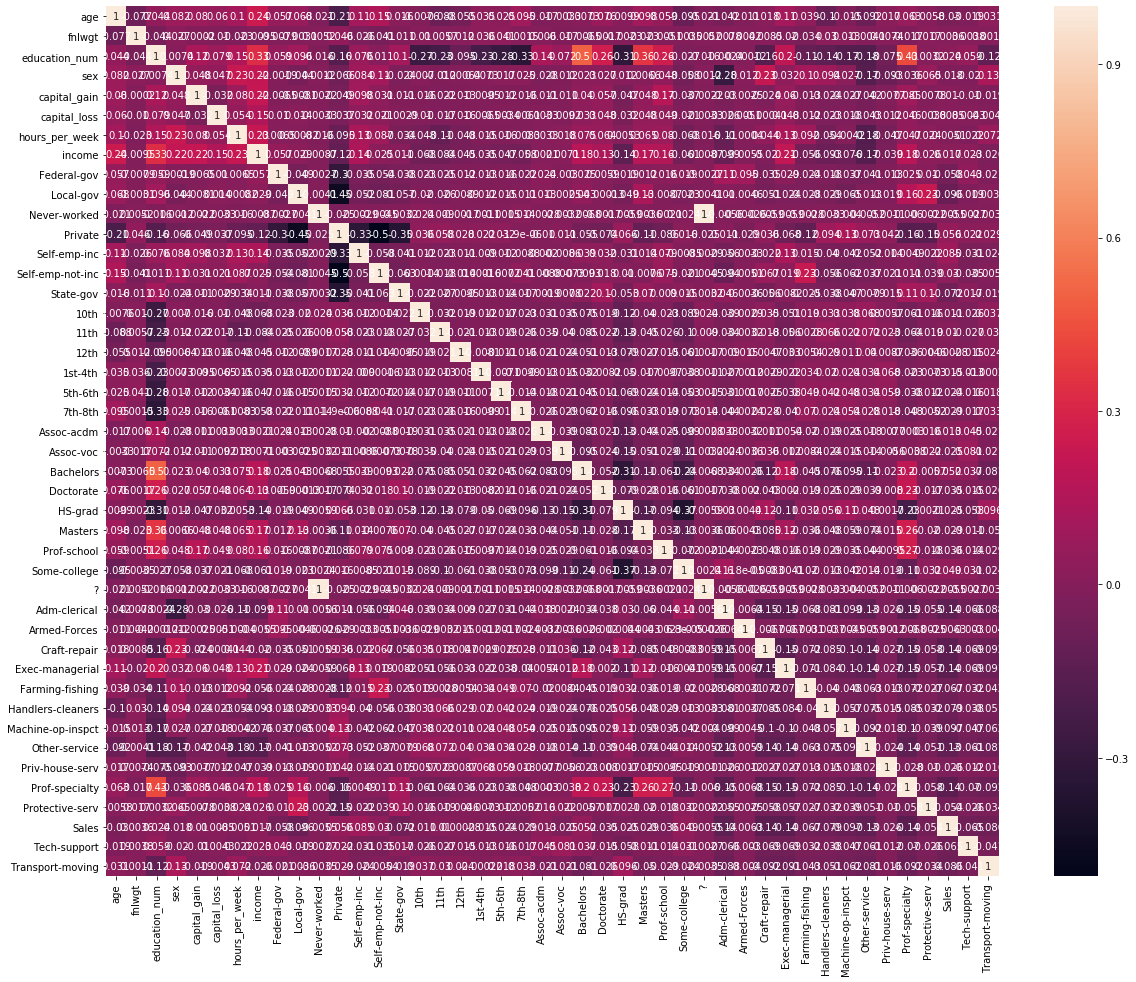

In [125]:
corr_hmap=final6.corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [147]:
print(final6.head())

   age  fnlwgt  education_num  sex  capital_gain  capital_loss  \
1   82  132870              9    0             0          4356   
3   54  140359              4    0             0          3900   
4   41  264663             10    0             0          3900   
5   34  216864              9    0             0          3770   
6   38  150601              6    1             0          3770   

   hours_per_week  income  Federal-gov  Local-gov  ...  Farming-fishing  \
1              18       0            0          0  ...                0   
3              40       0            0          0  ...                0   
4              40       0            0          0  ...                0   
5              45       0            0          0  ...                0   
6              40       0            0          0  ...                0   

   Handlers-cleaners  Machine-op-inspct  Other-service  Priv-house-serv  \
1                  0                  0              0                0   
3 

In [127]:
model=LinearRegression()

In [131]:
x=final6.drop('income',axis='columns')
x.head()

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,Federal-gov,Local-gov,Never-worked,...,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
1,82,132870,9,0,0,4356,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,54,140359,4,0,0,3900,40,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,41,264663,10,0,0,3900,40,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,34,216864,9,0,0,3770,45,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,38,150601,6,1,0,3770,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
y=final6.income
y

1        0
3        0
4        0
5        0
6        0
7        1
8        0
9        1
10       1
11       1
12       1
13       1
15       1
16       1
17       1
18       1
19       1
20       1
21       0
22       0
23       0
25       0
26       0
27       0
28       1
29       1
30       1
31       1
32       1
33       1
        ..
32525    0
32526    0
32527    0
32529    0
32530    0
32531    0
32532    0
32535    1
32536    1
32537    0
32538    0
32539    1
32540    0
32542    0
32545    0
32546    0
32547    1
32548    0
32549    0
32550    0
32551    0
32552    0
32553    0
32554    0
32555    1
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 30725, dtype: int32

In [135]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [149]:
x.head()

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,Federal-gov,Local-gov,Never-worked,...,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
1,82,132870,9,0,0,4356,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,54,140359,4,0,0,3900,40,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,41,264663,10,0,0,3900,40,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,34,216864,9,0,0,3770,45,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,38,150601,6,1,0,3770,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
x.shape

(30725, 43)

In [151]:
t=np.array([54,140359,4,0,0,3900,40,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,1,0,0])

In [152]:
t.shape

(43,)

In [153]:
t=t.reshape(1,-1)

In [154]:
model.predict(t)

array([0.68665596])

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(30,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=r_state)
    lr=linear_model.LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state:",r_state,"is",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score corresponding to",final_r_state,"is",max_r_score)

r2_score corresponding to random state: 30 is 0.32105179158417796
r2_score corresponding to random state: 31 is 0.3748733468760549
r2_score corresponding to random state: 32 is -0.0863128712326462
r2_score corresponding to random state: 33 is 0.030382201602872194
r2_score corresponding to random state: 34 is 0.47492283571876237
r2_score corresponding to random state: 35 is -0.2381647088804726
r2_score corresponding to random state: 36 is 0.5586103571099181
r2_score corresponding to random state: 37 is 0.18020709059844153
r2_score corresponding to random state: 38 is 0.05477600425021045
r2_score corresponding to random state: 39 is 0.4465901912889463
r2_score corresponding to random state: 40 is -0.06605596288630422
r2_score corresponding to random state: 41 is 0.21526062458312079
r2_score corresponding to random state: 42 is 0.30047100070085453
r2_score corresponding to random state: 43 is -0.11192513013142813
r2_score corresponding to random state: 44 is 0.008033592132729472
r2_score 

In [202]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=90,random_state=40)

In [203]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
y_pred=lr.predict(x_test)
r2_scr=r2_score(y_test,y_pred)
print("r2score is:",r2_scr)


r2score is: 0.07397786491059177


In [205]:
from sklearn.externals import joblib
joblib.dump(model,"adult.csv")

['adult.csv']